In [1]:
import os


if 'tfg' not in os.listdir():
    os.chdir('..')

In [2]:
import matplotlib.pyplot as plt

from tfg.strategies import Minimax, MonteCarloTree, UCT
from game.tictactoe import TicTacToe
from tfg.util import play

In [3]:
game = TicTacToe()
minimax = Minimax(game)
n_iter = 500

In [4]:
cs = [0, .5, .75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3]
draws_white = list()
draws_black = list()

for c in cs:
    mcts = MonteCarloTree(game, max_iter=n_iter, selection_policy=UCT(c), reset_tree=False)
    _, dw, _ = play(game, mcts, minimax, games=50, max_workers=10)
    draws_white.append(dw)
    _, db, _ = play(game, minimax, mcts, games=50, max_workers=10)
    draws_black.append(db)

draws_white, draws_black

([0, 50, 50, 50, 50, 50, 50, 50, 50, 50],
 [0, 41, 44, 40, 41, 47, 45, 37, 38, 36])

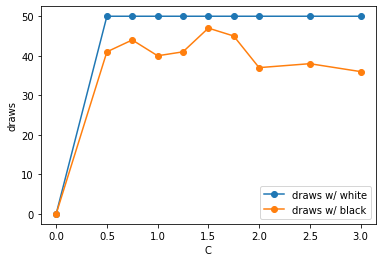

In [5]:
plt.plot(cs, draws_white, '-o')
plt.plot(cs, draws_black, '-o')

plt.legend(['draws w/ white', 'draws w/ black'])
plt.xlabel('C')
plt.ylabel('draws')
plt.show()

In [6]:
_, c = max(enumerate(cs), key=lambda ic: draws_black[ic[0]])
c

1.5

In [7]:
n_iters = [100, 200, 400, 800, 1200]
draws = list()

for n in n_iters:
    mcts = MonteCarloTree(game, max_iter=n, selection_policy=UCT(c), reset_tree=False)
    _, d, _ = play(game, minimax, mcts, games=50, max_workers=10)
    draws.append(d)

draws

[25, 25, 40, 44, 49]

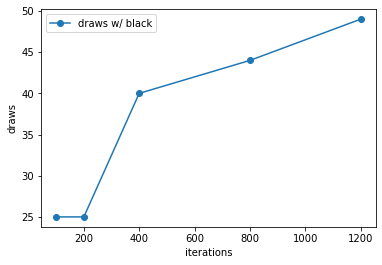

In [8]:
plt.plot(n_iters, draws, '-o')

plt.legend(['draws w/ black'])
plt.xlabel('iterations')
plt.ylabel('draws')
plt.show()